# Die Fourierzerlegung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integr

### Hie definieren wir uns Sinus- und Kosinusfunktionen, 
### die in das Intervall [-L,L] reinpassen

In [2]:
#Definition von Funktionen
def cos(x,n=1,L=1):
    return np.cos(n*np.pi/L*x)
def sin(x,n,L):
    return np.sin(n*np.pi/L*x)

In [3]:
def f(x):
    return x**2-x**4
def F(x):
    return (x**3)/3. - (x**5)/5.

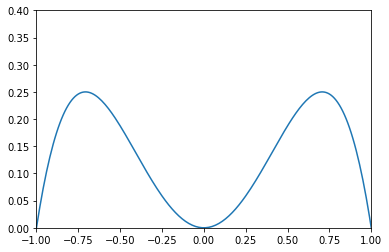

In [8]:
%matplotlib inline
x = np.linspace(-1,1.,201)
fig, ax = plt.subplots() # let us plot the data
ax.set_xlim([-1, 1])
ax.set_ylim([0, .4])
ax.plot(x,f(x))
#ax.plot(x,y)

In [7]:
x = np.linspace(-1,1,201)

<IPython.core.display.Javascript object>


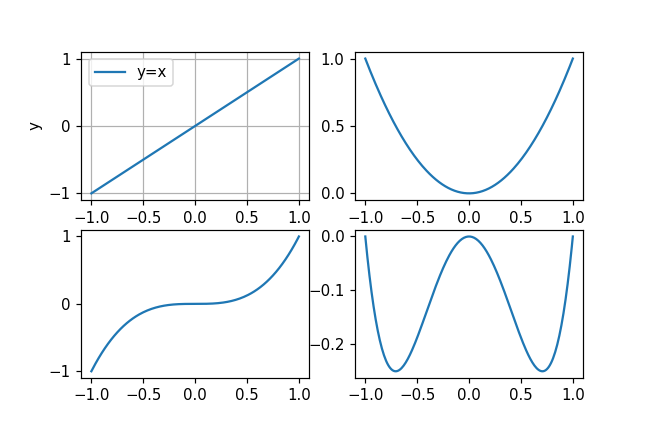

In [27]:
%matplotlib notebook
fig, ax = plt.subplots(2,2)
ax[0,0].plot(x,x,label='y=x')
ax[0,0].set_ylabel('y')
ax[0,0].legend()
ax[0,0].grid()
ax[0,1].plot(x,x**2)
ax[1,0].plot(x,x**3)
ax[1,1].plot(x,x**4-x**2)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(x,x,label='y=x')
ax.set_ylabel('y')
ax.grid(ls='--')
ax.plot(x,x**2,label='y=x**2')
ax.plot(x,x**3,label='y=x**3')
ax.plot(x,x**4-x**2,label='y=x**4-x**2')
ax.legend()

# Integration
Integration mit numpy.trapz

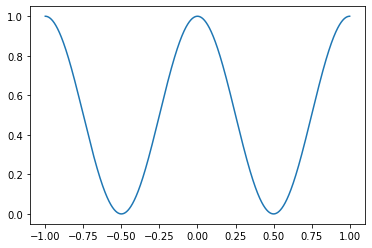

In [35]:
L = 1.
n = 1
m = 1
x = np.linspace(-1.,1.,20001)
#plt.plot(x,cos(x,n,L))
#plt.plot(x,cos(x,m,L))
plt.plot(x,cos(x,n,L)*cos(x,m,L))
#np.trapz(cos(x,n,L))

In [71]:
L=1
c = [np.trapz(cos(x,i,L)*f(x),dx=0.01) for i in np.arange(101)]
#s = [np.trapz(sin(x,i,L)*f(x),dx=0.01) for i in np.arange(11)]
y_cos = np.array([c[i]*cos(x,i,L) for i in np.arange(101)])
y_cos[0] = y_cos[0]/2

<IPython.core.display.Javascript object>


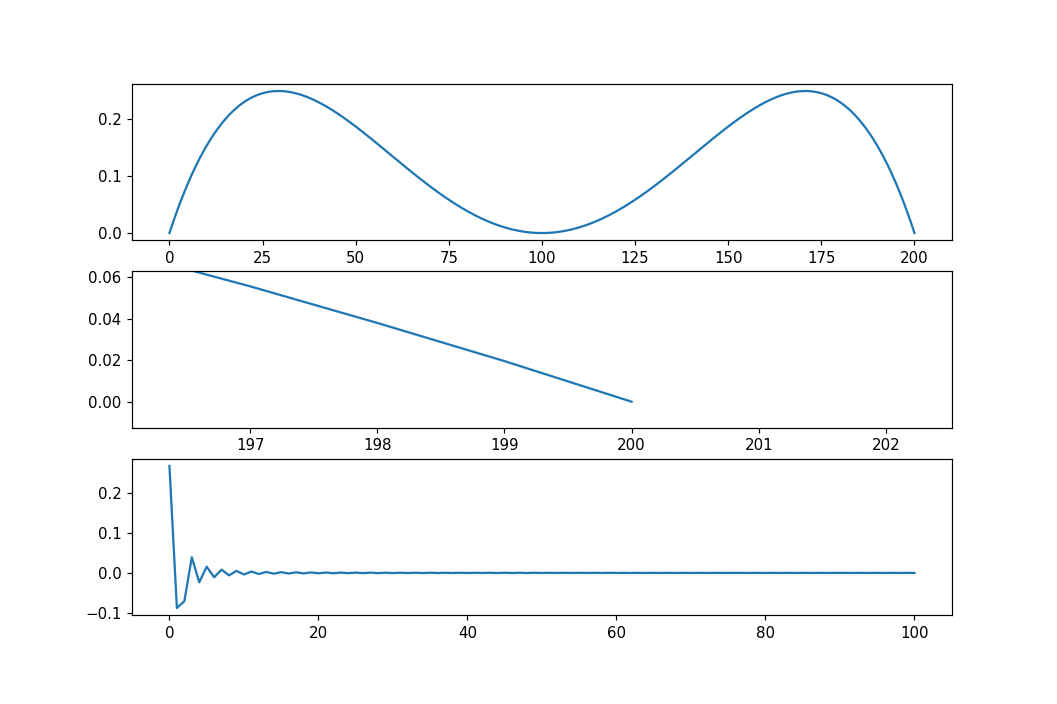

In [80]:
%matplotlib notebook
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
#
#for i in np.arange(11):
#    ax.plot(y_cos[i])
ax1.plot(f(x))
ax2.plot(np.sum(y_cos,axis=0))
ax3.plot(c)

In [60]:
y_cos[0] = y_cos[0]/2.

In [51]:
a = np.arange(1,101)
a = a.reshape((10,10))

In [52]:
a

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [55]:
np.sum(a,axis=1)

array([ 55, 155, 255, 355, 455, 555, 655, 755, 855, 955])

In [73]:
len(c)

101

In [75]:
plt.plot(c)

In [81]:
f(x)-np.sum(y_cos,axis=0)

array([ 4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05,
       -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,
        4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05,
       -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,
        4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05,
       -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,
        4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05,
       -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,
        4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05,
       -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,
        4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05,
       -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,
        4.9995e-05, -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05,
       -4.9995e-05,  4.9995e-05, -4.9995e-05,  4.9995e-05, -4.99

In [82]:
f(x).shape

(201,)